In [8]:
from dbase import *
from imports_func import *

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
subjects_1_3_idx=[] #to store indices of subjects with jacobians of classes 1 or 3
labels=[]

#only subject indices with all jacobians of the same class (1 or 3) are stored
for s in range(0,len(Subjects)):
    counter1 = 0
    counter3 = 0
    for i in range(0,len(Subjects[s].jacobians)):
        if Subjects[s].jacobians[i].label == 1:
            counter1 = counter1 + 1
        if Subjects[s].jacobians[i].label == 3:
            counter3 = counter3 + 1
    if (counter1 == len(Subjects[s].jacobians) or counter3 == len(Subjects[s].jacobians)) and len(Subjects[s].jacobians) > 0:
        subjects_1_3_idx.append(s)
        if counter3 > counter1:
            labels.append(3)
        else:
            labels.append(1)

print("the list has a total of ", len(subjects_1_3_idx), " indices.")

the list has a total of  124  indices.


In [6]:
vars(Subjects[62].event[0])

AttributeError: 'Subject' object has no attribute 'Event'

In [4]:
print(subjects_1_3_idx)
print(labels)

[2, 5, 6, 7, 8, 9, 13, 15, 20, 22, 24, 26, 27, 32, 33, 38, 39, 47, 53, 60, 61, 62, 64, 65, 84, 86, 87, 99, 104, 110, 115, 124, 131, 136, 144, 146, 159, 163, 166, 168, 177, 178, 179, 181, 182, 186, 189, 190, 200, 202, 206, 216, 221, 225, 227, 228, 229, 230, 242, 244, 255, 265, 271, 277, 293, 296, 308, 309, 320, 344, 365, 376, 384, 506, 509, 512, 516, 524, 528, 535, 541, 543, 555, 572, 575, 581, 584, 586, 597, 602, 605, 612, 632, 636, 640, 648, 653, 662, 665, 673, 680, 681, 686, 689, 695, 703, 705, 717, 725, 732, 736, 737, 741, 748, 759, 776, 779, 786, 788, 793, 802, 835, 844, 889]
[3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1]


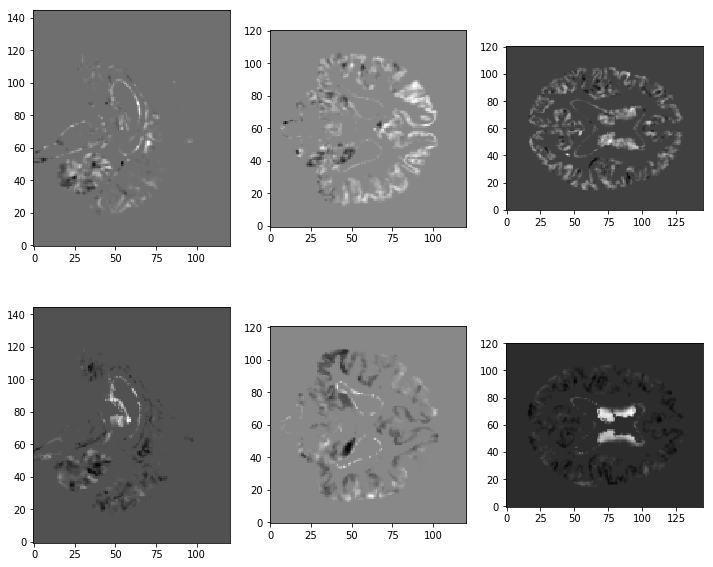

In [53]:
import nibabel as nib

#47
img = nib.load('/home/miquel/ForMiquel/ADNI_longitudinal_proc_short/S47_2/wmaskedc1_jd_S47_r0_8900_t2_84630.nii.gz')
data = img.get_data()
plt.figure(figsize=(12,10))
plt.subplot(2,3,1).imshow(data[60,:,:], cmap="gray", origin="lower")
plt.subplot(2,3,2).imshow(data[:,60,:], cmap="gray", origin="lower")
plt.subplot(2,3,3).imshow(data[:,:,60], cmap="gray", origin="lower")


#35, 62

img = nib.load('/home/miquel/ForMiquel/ADNI_longitudinal_proc_short/S173_2/wmaskedc1_jd_S173_r0_11033_t2_90493.nii.gz')
data = img.get_data()
plt.subplot(2,3,4).imshow(data[60,:,:], cmap="gray", origin="lower")
plt.subplot(2,3,5).imshow(data[:,60,:], cmap="gray", origin="lower")
plt.subplot(2,3,6).imshow(data[:,:,60], cmap="gray", origin="lower")


plt.show()

In [3]:
# we build the X matrix including all jacobians from controls and preclinicals (all jacobians class 1 or 3)
#X=np.load('/home/miquel/ForMiquel/CLEAN2/X.npy')
#print(np.shape(X))
import nibabel as nib
from imports_func import *
X = np.zeros((121*145*121))
#subjects_identifiers = []
aux1 = 'wmaskedc1_'
aux2 = 'wmaskedc2_'
aux3 = 'wmaskedc3_'
counter = 0
for idx in subjects_1_3_idx:
    print(counter)
    for j in Subjects[idx].jacobians:        
        #path1 = j.jb.replace(j.jb.split('/')[-1], aux1 + j.jb.split('/')[-1])
        #path2 = j.jb.replace(j.jb.split('/')[-1], aux2 + j.jb.split('/')[-1])   
        path3 = j.jb.replace(j.jb.split('/')[-1], aux3 + j.jb.split('/')[-1])
        #if path1[-1] == 'i' :
        #    path1 = path1 + '.gz'
        #if path2[-1] == 'i' :
        #    path2 = path2 + '.gz'
        if path3[-1] == 'i' :
            path3 = path3 + '.gz'

        #img1 = nib.load(path1)
        #img1 = img1.get_data()
        #img2 = nib.load(path2)
        #img2 = img2.get_data()
        img3 = nib.load(path3)
        img3 = img3.get_data()
        
        #img1 = np.reshape(img1, 121*145*121, 1)
        #img2 = np.reshape(img2, 121*145*121, 1)
        img3 = np.reshape(img3, 121*145*121, 1)
        #line = np.append(img1, np.append(img2,img3))
        X = np.vstack((X, img3))
        #subjects_identifiers.append(idx)
    counter = counter + 1
        
X=X[1:,:]
mask=np.all(np.equal(X,0), axis=0)
X = X[:,~mask]
print(np.shape(X))
np.save('/home/miquel/ForMiquel/CLEAN2/X_c3', X)
np.save('/home/miquel/ForMiquel/CLEAN2/zero_cols_JB_c3',mask)

        

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
(288, 783405)


In [4]:
#y=np.load('/home/miquel/ForMiquel/CLEAN2/y.npy') #jacobian labels
y_short=np.load('/home/miquel/ForMiquel/CLEAN2/labels_c2.npy') #subject labels

#y = 1*(np.equal(y,np.ones(288)*3))
y_short = 1*(np.equal(y_short,np.ones(124)*3))

#np.save('/home/miquel/ForMiquel/CLEAN2/y_c2', y)
np.save('/home/miquel/ForMiquel/CLEAN2/y_short', y_short)

In [10]:
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c1_dt.npy') 
#X2=np.load('/home/miquel/ForMiquel/CLEAN2/X_c2.npy')
#X3=np.load('/home/miquel/ForMiquel/CLEAN2/X_c3.npy')
#X=np.concatenate((X1, X2), axis=1)
#X=np.concatenate((X, X3), axis=1)
y=np.load('/home/miquel/ForMiquel/CLEAN2/y.npy') #jacobian labels
y_short=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy') #subject labels
sub_id=np.load('/home/miquel/ForMiquel/CLEAN2/sub_id.npy') #jacobian idxs
sub_id_short=np.load('/home/miquel/ForMiquel/CLEAN2/sub_id_short.npy') #subject idxs

In [11]:
from imports_func import * 
spl = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in spl.split(sub_id_short, y_short): #split in subjects
    sub_id_train = sub_id_short[train_index] #search subject train idxs
    idx = np.isin(sub_id, sub_id_train) #match train idxs 
    X_train = X[idx,:]
    X_test = X[~idx,:]
    y_train = y[idx]
    y_test = y[~idx]

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
clf = SVC(kernel='linear', probability = True)
#clf = LogisticRegression(solver='liblinear', penalty='l2')
feat = np.linspace(10000, 573241, num=5)

l=len(feat)

aux = len(X[0])

clf.fit(X_train, y_train)
w = np.transpose(clf.coef_) #importance of each feature for classification
w=np.abs(w)
w = np.reshape(w, len(w))

for i in feat:
    print(i)
    n=i.astype(int)
    idxs=w.argsort()[-n:][::-1]
    idxs=np.sort(idxs)
    mask = np.zeros(aux, dtype=bool)
    mask[idxs]=True

    X_train_2= X_train[:,mask] #take columns of features with large (abs value) weights
    X_test_2=X_test[:,mask]
    
    clf = SVC(kernel='linear', probability = True)

    y_score = clf.fit(X_train_2, y_train).decision_function(X_test_2)
    pred = clf.predict(X_test_2)
    acc = accuracy_score(y_test, pred)
    roc=roc_auc_score(y_test, y_score)
    f1=f1_score(y_test, pred)
    
    print(acc)
    print(roc)
    print(f1)
    




10000.0
0.625
0.568421052632
0.4
31111.1111111
0.625
0.560526315789
0.421052631579
52222.2222222
0.602272727273
0.563157894737
0.385964912281
73333.3333333
0.602272727273
0.57
0.385964912281
94444.4444444
0.625
0.573157894737
0.421052631579
115555.555556
0.625
0.578947368421
0.421052631579
136666.666667
0.636363636364
0.581578947368
0.448275862069
157777.777778
0.636363636364
0.585263157895
0.448275862069
178888.888889
0.636363636364
0.586315789474
0.448275862069
200000.0
0.647727272727
0.587368421053
0.474576271186


In [21]:
#random forest reduction of features and classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=48000)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(y_test)
print(pred)


0.537313432836
[1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# instantiate learning model 
knn = KNeighborsClassifier(n_neighbors=35)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
accuracy_score(y_test, pred)

0.53731343283582089

In [3]:
vars(Subjects[20].jacobians[0])

{'avg': '/disco2/LEGACY_PAULA/ADNI_longitudinal_proc/S47_2/avgj_S47_r0_8900_t1_32315.nii.gz',
 'dCSFi1': 0.08038003718195569,
 'dCSFi2': 0.05948156192786552,
 'dabeta': -19.0,
 'dir': 'S47_2/',
 'dptau': -3.6000000000000014,
 'dt': 362,
 'dtau': -5.5,
 'dv': '/disco2/LEGACY_PAULA/ADNI_longitudinal_proc/S47_2/dv_S47_r0_8900_t1_32315.nii',
 'jb': '/disco2/LEGACY_PAULA/ADNI_longitudinal_proc/S47_2/jd_S47_r0_8900_t1_32315.nii',
 'label': 1,
 'log': '',
 'nii': '',
 'reference': <allmypy.Event at 0x7f6d25909a90>,
 'rid': 47,
 'subject_id': '100_S_0047',
 'target': <allmypy.Event at 0x7f6d25909b38>}

## divide matrices by dt

In [5]:
dt_1_3_idx=[]
for i in subjects_1_3_idx:
    for j in Subjects[i].jacobians:
        dt_1_3_idx.append(j.dt)
print(np.shape(dt_1_3_idx))        
np.save('/home/miquel/ForMiquel/CLEAN2/dt', dt_1_3_idx)        

(288,)


In [6]:
dt = np.asarray(dt_1_3_idx)
X=np.load('/home/miquel/ForMiquel/CLEAN2/X_c3.npy') 
X_dt=np.transpose(X)/dt
X_dt=np.transpose(X_dt)
#np.save('/home/miquel/ForMiquel/CLEAN2/X_c3_dt', X_dt)

In [5]:
clf = SVC(kernel='linear', probability = True)

y_score = clf.fit(X_train, y_train).decision_function(X_test)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
roc=roc_auc_score(y_test, y_score)
f1=f1_score(y_test, pred)
    
print(acc)
print(roc)
print(f1)

0.647727272727
0.591578947368
0.474576271186


In [ ]:
print(np.shape(X_train))
S = SelectPercentile(percentile=5)
#S = SelectKBest(f_classif, k=1000)
S.fit(X_train, y_train)
X_train = X_train[:,S.get_support()]
X_test = X_test[:,S.get_support()]

print(np.shape(X_train))
print(np.shape(X_test))

    
#clf = SVC(kernel="linear", C=100000)
clf = LogisticRegression(solver='liblinear', penalty='l2', C=10000)

y_score = clf.fit(X_train, y_train).decision_function(X_test)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
roc=roc_auc_score(y_test, y_score)
f1=f1_score(y_test, pred)
mcc=matthews_corrcoef(y_test, pred)
aps=average_precision_score(y_test, y_score)

print(acc)
print(roc)
print(f1)
print(mcc)
print(aps)
confusion_matrix(y_test, pred)


(221, 573241)


In [8]:
y=np.load('/home/miquel/ForMiquel/CLEAN2/y.npy') #jacobian labels
y_short=np.load('/home/miquel/ForMiquel/CLEAN2/y_short.npy') #subject labels
print(y)
print(y_short)
sub_id=np.load('/home/miquel/ForMiquel/CLEAN2/sub_id.npy') #jacobian idxs
sub_id_short=np.load('/home/miquel/ForMiquel/CLEAN2/sub_id_short.npy') #subject idxs
print()
print(sub_id)
print(sub_id_short)
print()
dt=np.load('/home/miquel/ForMiquel/CLEAN2/dt.npy') #subject idxs
print(dt)

[1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0]
[1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 1 0 1 0 0 0 0]

[  2   5   6   7   8   9  13  13  13  15  20  20  20  22  22  22  24  24
  24  26  27  32  33  33  33  33  33  33  38  38  38  38  38  38  38  38
  38  38  39  4

In [13]:
counter = 0
for i in range(0,288):
    if dt[i] <365 and y[i]==1:
        counter = counter + 1
    
print(counter)    

19


In [10]:
sum(y)

114

In [1]:
subjects_1_3_idx=[] #to store indices of subjects with jacobians of classes 1 or 3
labels=numpy.zeros((, 124), dtype=bool)
print(labels)

#only subject indices with all jacobians of the same class (1 or 3) are stored
for s in range(0,len(Subjects)):
    counter1 = 0
    counter3 = 0
    for i in range(0,len(Subjects[s].jacobians)):
        if Subjects[s].jacobians[i].dt > 415:
            labels[s]

    if (counter1 == len(Subjects[s].jacobians) or counter3 == len(Subjects[s].jacobians)) and len(Subjects[s].jacobians) > 0:
        subjects_1_3_idx.append(s)
        if counter3 > counter1:
            labels.append(3)
        else:
            labels.append(1)

print("the list has a total of ", len(subjects_1_3_idx), " indices.")

SyntaxError: invalid syntax (<ipython-input-1-34117d5cb16b>, line 2)

In [12]:
sub_id_short=np.load('/home/miquel/ForMiquel/CLEAN2/sub_id_short.npy') #subject idxs
labels=np.zeros( 124, dtype=bool)
print(labels)


for s in range(0,len(sub_id_short)):
    for i in range(0,len(Subjects[sub_id_short[s]].jacobians)):
                if Subjects[sub_id_short[s]].jacobians[i].dt > 415:
                    labels[s] = True
                    
                    
print(labels)

np.load('/home/miquel/ForMiquel/CLEAN2/zero_cols_JB_c1_c2.npy') #subject idxs
np.save('/home/miquel/ForMiquel/CLEAN2/sub_id_1_dt_415.npy',labels)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[False False False False False False  True False  True  True  True False
 False False  True  True False  True False False False  True False  True
  True  True  True  True False  True  True False  True False False False
  True  True False  True 